In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('obesity_data.csv')

df


,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight
...,...,...,...,...,...,...,...
995,18,Male,155.588674,64.103182,26.480345,4,Overweight
996,35,Female,165.076490,97.639771,35.830783,1,Obese
997,49,Female,156.570956,78.804284,32.146036,1,Obese
998,64,Male,164.192222,57.978115,21.505965,4,Normal weight


In [3]:
df.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

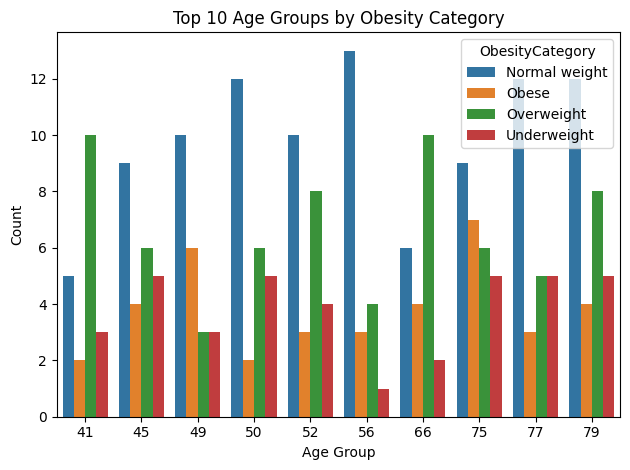

In [5]:
aggregated_data = df.groupby(['Age', 'ObesityCategory']).size().reset_index(name='count')

top_n_age_groups = aggregated_data.groupby('Age')['count'].sum().nlargest(10).index
aggregated_data_top_n = aggregated_data[aggregated_data['Age'].isin(top_n_age_groups)]


sns.barplot(x='Age', y='count', hue='ObesityCategory', data=aggregated_data_top_n)
plt.title('Top 10 Age Groups by Obesity Category')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()  
plt.show()


c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

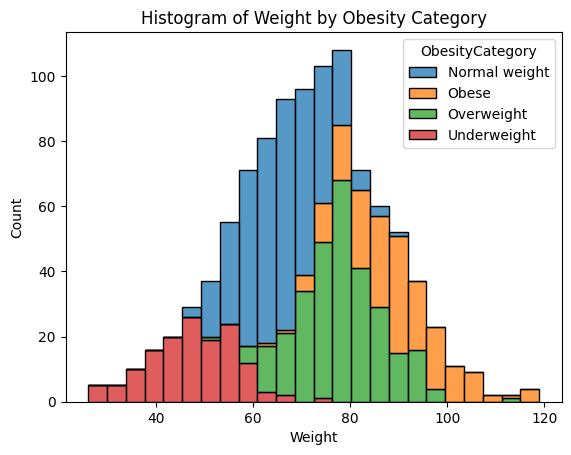

In [6]:
sns.histplot(data = df, x='Weight', hue='ObesityCategory', multiple='stack')
plt.title('Histogram of Weight by Obesity Category')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()


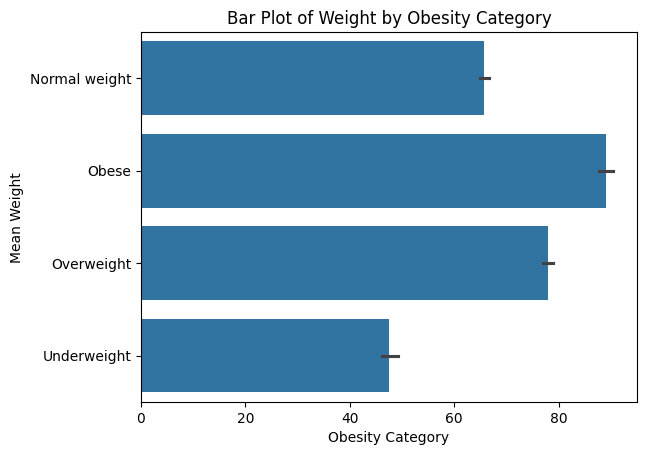

In [7]:
sns.barplot(x='Weight', y='ObesityCategory', data = df)
plt.title('Bar Plot of Weight by Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('Mean Weight')
plt.show()


c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

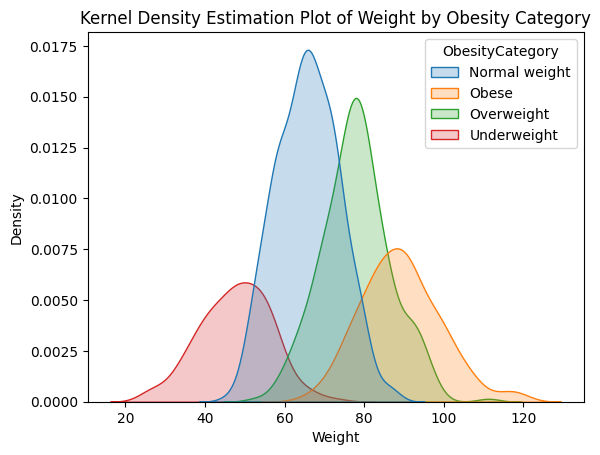

In [8]:
sns.kdeplot(data = df, x='Weight', hue='ObesityCategory', fill=True)
plt.title('Kernel Density Estimation Plot of Weight by Obesity Category')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.show()



In [9]:
df.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

encoder = OneHotEncoder()

encoded_gender = encoder.fit_transform(df[['Gender']]).toarray()

df = df.drop('Gender', axis = 1)

df = pd.concat([df, pd.DataFrame(encoded_gender, columns = encoder.get_feature_names_out(['Gender']))], axis = 1)

df.head()



,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Gender_Female,Gender_Male
0,56,173.575262,71.982051,23.891783,4,Normal weight,0.0,1.0
1,69,164.127306,89.959256,33.395209,2,Obese,0.0,1.0
2,46,168.072202,72.930629,25.817737,4,Overweight,1.0,0.0
3,32,168.459633,84.886912,29.912247,3,Overweight,0.0,1.0
4,60,183.568568,69.038945,20.487903,3,Normal weight,0.0,1.0


In [11]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
label_encoder = LabelEncoder()

X = df.drop('ObesityCategory', axis = 1)
y = df['ObesityCategory']

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy: 0.2f}')


Accuracy:  1.00


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[72  0  0  0]
 [ 0 32  0  0]
 [ 0  0 65  0]
 [ 0  0  0 31]]
Classification Report:
                precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00        72
        Obese       1.00      1.00      1.00        32
   Overweight       1.00      1.00      1.00        65
  Underweight       1.00      1.00      1.00        31

     accuracy                           1.00       200
    macro avg       1.00      1.00      1.00       200
 weighted avg       1.00      1.00      1.00       200



In [14]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X_scaled_df, y_encoded, cv=5)
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Score: {cross_val_scores.mean():.2f}')


Cross-Validation Scores: [1.    0.99  0.995 0.99  1.   ]
Mean Cross-Validation Score: 0.99


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer



In [16]:
df.head()

,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Gender_Female,Gender_Male
0,56,173.575262,71.982051,23.891783,4,Normal weight,0.0,1.0
1,69,164.127306,89.959256,33.395209,2,Obese,0.0,1.0
2,46,168.072202,72.930629,25.817737,4,Overweight,1.0,0.0
3,32,168.459633,84.886912,29.912247,3,Overweight,0.0,1.0
4,60,183.568568,69.038945,20.487903,3,Normal weight,0.0,1.0


In [17]:
X = df.drop('ObesityCategory', axis = 1)
y = df['ObesityCategory']

numeric_feature = ['Age', 'Height', 'Weight', 'BMI']

encoded_feature = ['ObesityCategory']

numeric_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

encoded_transformer = Pipeline(steps = [
    ('label', LabelEncoder())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_feature),
        ('lab', encoded_transformer, encoded_feature)
    ]
)

model = RandomForestClassifier(random_state = 42)

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy: 0.2f}')



Accuracy:  1.00


NOW USING NEURAL NETWORK


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('obesity_data.csv')



In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

encoder = OneHotEncoder()

encoded_gender = encoder.fit_transform(df[['Gender']]).toarray()

df = df.drop('Gender', axis = 1)

df = pd.concat([df, pd.DataFrame(encoded_gender, columns = encoder.get_feature_names_out(['Gender']))], axis = 1)

df.head()



,Age,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory,Gender_Female,Gender_Male
0,56,173.575262,71.982051,23.891783,4,Normal weight,0.0,1.0
1,69,164.127306,89.959256,33.395209,2,Obese,0.0,1.0
2,46,168.072202,72.930629,25.817737,4,Overweight,1.0,0.0
3,32,168.459633,84.886912,29.912247,3,Overweight,0.0,1.0
4,60,183.568568,69.038945,20.487903,3,Normal weight,0.0,1.0


In [21]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = df.drop('ObesityCategory', axis=1)
y = df['ObesityCategory']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_categorical, test_size=0.2, random_state=42)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=2)

c:\Users\Osama\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 - 2s - 101ms/step - accuracy: 0.3594 - loss: 1.3444 - val_accuracy: 0.4812 - val_loss: 1.1971
Epoch 2/50
20/20 - 0s - 5ms/step - accuracy: 0.4672 - loss: 1.1914 - val_accuracy: 0.6500 - val_loss: 1.0416
Epoch 3/50
20/20 - 0s - 5ms/step - accuracy: 0.5312 - loss: 1.0859 - val_accuracy: 0.7750 - val_loss: 0.8920
Epoch 4/50
20/20 - 0s - 6ms/step - accuracy: 0.6344 - loss: 0.9131 - val_accuracy: 0.8000 - val_loss: 0.7551
Epoch 5/50
20/20 - 0s - 8ms/step - accuracy: 0.6891 - loss: 0.8057 - val_accuracy: 0.8687 - val_loss: 0.6438
Epoch 6/50
20/20 - 0s - 7ms/step - accuracy: 0.7109 - loss: 0.7386 - val_accuracy: 0.8438 - val_loss: 0.5726
Epoch 7/50
20/20 - 0s - 9ms/step - accuracy: 0.7469 - loss: 0.6626 - val_accuracy: 0.8875 - val_loss: 0.4965
Epoch 8/50
20/20 - 0s - 7ms/step - accuracy: 0.7328 - loss: 0.6257 - val_accuracy: 0.8750 - val_loss: 0.4532
Epoch 9/50
20/20 - 0s - 6ms/step - accuracy: 0.7609 - loss: 0.5722 - val_accuracy: 0.8875 - val_loss: 0.4124
Epoch 10/50
20/20

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.2f}')

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_)
print("Classification Report:\n", class_report)


Test Accuracy: 0.94
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Confusion Matrix:
 [[67  0  2  3]
 [ 0 30  2  0]
 [ 2  3 60  0]
 [ 0  0  0 31]]
Classification Report:
                precision    recall  f1-score   support

Normal weight       0.97      0.93      0.95        72
        Obese       0.91      0.94      0.92        32
   Overweight       0.94      0.92      0.93        65
  Underweight       0.91      1.00      0.95        31

     accuracy                           0.94       200
    macro avg       0.93      0.95      0.94       200
 weighted avg       0.94      0.94      0.94       200

